In [2]:
# How far back does the 'Max past mass' occur?

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/u/e/jb2854/Mergers_Project')
from illustris_python import illustris_python as il
sys.path.append('/u/e/jb2854/Mergers_Project')
import tools

basePath = '/x/Physics/AstroPhysics/Shared-New/DATA/IllustrisTNG/TNG100-1/output'

In [3]:
subhalo_data = il.groupcat.loadSubhalos(basePath, 99, fields=['SubhaloFlag','SubhaloMassType'])
subhalo_flag = subhalo_data['SubhaloFlag']

In [4]:
good_gal_masses = subhalo_data['SubhaloMassType'][np.where(subhalo_flag==1)[0]]

In [5]:
masses = np.array([good_gal_masses[:,il.util.partTypeNum('stars')],good_gal_masses[:,il.util.partTypeNum('dm')]])
print(np.where(masses[0,:] > 0))
print(np.where(masses[1,:] > 0))
good_idx = np.intersect1d(np.where(masses[0,:] > 0)[0], np.where(masses[1,:] > 0)[0])
print(good_idx)
#masses = masses[masses[0]>0]


(array([      0,       1,       2, ..., 4335205, 4340139, 4346151]),)
(array([      0,       1,       2, ..., 4361027, 4361028, 4361029]),)
[      0       1       2 ... 4335205 4340139 4346151]


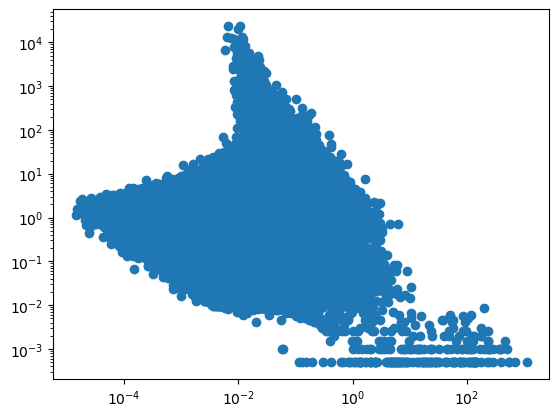

In [70]:
plt.scatter(masses[0,good_idx]/masses[1,good_idx],masses[1,good_idx])
plt.yscale('log')
plt.xscale('log')

In [16]:
# get the indices of the primary galaxies in each group, snapshot 99/z=0
groupFirstSub = il.groupcat.loadHalos(basePath,99,fields=['GroupFirstSub'])

# get masses plus flag saying whether galaxy should be trusted
# returns a dict with the specified keywords
subhalo_data = il.groupcat.loadSubhalos(basePath, 99, fields=['SubhaloFlag','SubhaloMassType'])
subhalo_flag = subhalo_data['SubhaloFlag']

# choose which galaxies to plot
good_cen_idx = np.intersect1d(groupFirstSub, np.where(subhalo_flag==1)[0]) # 'good' centrals
good_idx = subhalo_flag == 1                  # all 'good' galaxies, centrals and satellites

# stellar mass is in units of 1e10 MSun
# 'SubhaloMassType' is a 2D array storing the different particle types
subhalo_mass = subhalo_data['SubhaloMassType'][good_cen_idx]

print(np.max(subhalo_data['SubhaloMassType'][good_cen_idx, il.util.partTypeNum('dm')]))

23735.059


/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Connection between stellar and halo mass for all galaxies')

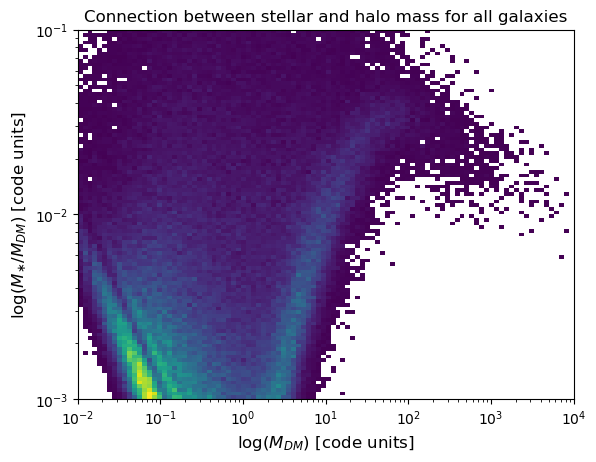

In [15]:
plt.hist2d(subhalo_mass[:,il.util.partTypeNum('dm')],subhalo_mass[:,il.util.partTypeNum('stars')]/subhalo_mass[:,il.util.partTypeNum('dm')],[np.logspace(-2,4,101), np.logspace(-3,-1,101)], cmin=1, cmax = 300)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\log(M_{\ast}/M_{DM})$ [code units]', size=12)
plt.xlabel(r'$\log(M_{DM})$ [code units]', size=12)
plt.title('Connection between stellar and halo mass for all galaxies')

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Connection between stellar and halo mass for all central galaxies')

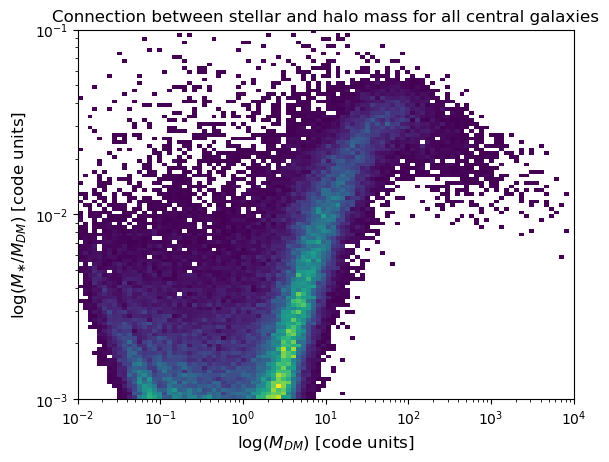

In [18]:
plt.hist2d(subhalo_mass[:,il.util.partTypeNum('dm')],subhalo_mass[:,il.util.partTypeNum('stars')]/subhalo_mass[:,il.util.partTypeNum('dm')],[np.logspace(-2,4,101), np.logspace(-3,-1,101)], cmin=1, cmax = 300)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\log(M_{\ast}/M_{DM})$ [code units]', size=12)
plt.xlabel(r'$\log(M_{DM})$ [code units]', size=12)
plt.title('Connection between stellar and halo mass for all central galaxies')